# Neural Network Classifier using Keras Sequential Model

### Loading required libraries

In [1]:
import pandas
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.visualize_util import plot

Using TensorFlow backend.


### Loding the dataset

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("ensemble.csv",header=None)
dataset = dataframe.values
X = dataset[:,0:20].astype(float)
Y = dataset[:,20]


### Hot Encoding the output classes

In [3]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

### Adding Tensorflow callback

In [4]:
tbCallback=keras.callbacks.TensorBoard(log_dir='./Tlogs', histogram_freq=0, write_graph=True, write_images=True)

### Simple Sequential Model without Validation

In [5]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=20,activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizers=['adam']

accu={}
for myoptimizer in optimizers:
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=myoptimizer, metrics=['accuracy'])

    # Fit the model
    model.fit(X, dummy_y, nb_epoch=100,verbose=0, batch_size=10,callbacks=[tbCallback])

    # evaluate the model
    scores = model.evaluate(X, dummy_y)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accu[myoptimizer]=scores[1]*100

Instructions for updating:
Please switch to tf.summary.merge_all.
Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.
24/24 [==============================] - 0s


In [6]:
print accu

{'adam': 50.0}


## Saving the model

In [7]:
from keras.models import load_model
model.save('./ensemble_model/EnsembleClassifier.h5') 

### Model Summary

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 20)            420         dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 18)            378         dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 16)            304         dense_2[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 16)            272         dense_3[0][0]                    
___________________________________________________________________________________________

### Plotting the model

In [9]:
plot(model, to_file='model.png')

### Visualizing the graph in notebook

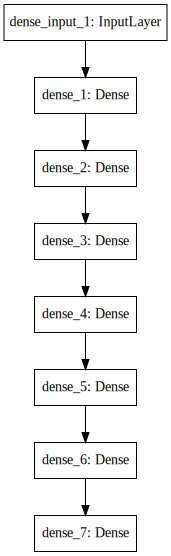

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))